# Entrega 1 - Projeto PCD

## Camila Barretto Lins Paes - 147.949
## Harrison Caetano Candido - 156.264
## Laura Maria Cunha Lisbôa - 163.882

## Instalações

In [ ]:
ls

diffusion.c             main.c               output_step_500.txt  sequencial_output_final.txt
diffusion_parallel*     output_final.txt     output_step_600.txt  sequencial_output_step_0.txt
diffusion_parallel.c    output_step_0.txt    output_step_700.txt  sequencial_output_step_100.txt
diffusion_sequential.c  output_step_100.txt  output_step_800.txt  sequencial_output_step_200.txt
difusao.c               output_step_200.txt  output_step_900.txt  sequencial_output_step_300.txt
difusao.x*              output_step_300.txt  processador.txt      sequencial_output_step_400.txt
main*                   output_step_400.txt  sample_data/


In [ ]:
!apt-get update
!apt-get install -y gcc

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
!apt-get install libgomp1

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgomp1 is already the newest version (12.3.0-1ubuntu1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 57 not upgraded.


## Código

###Sequencial

In [ ]:
%%writefile diffusion_sequential.c

#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#define N 600 // Tamanho da grade
#define T 1000 // Número de iterações
#define D 0.1 // Coeficiente de difusão
#define DELTA_T 0.01
#define DELTA_X 1.0

void diff_eq(double C[N][N], double C_new[N][N]) {
    for (int t = 0; t < T; t++) {
        for (int i = 1; i < N - 1; i++) {
            for (int j = 1; j < N - 1; j++) {
                C_new[i][j] = C[i][j] + D * DELTA_T * (
                    (C[i+1][j] + C[i-1][j] + C[i][j+1] + C[i][j-1] - 4 * C[i][j]) /
                    (DELTA_X * DELTA_X)
                );
            }
        }

        // Atualizar matriz para a próxima iteração
        for (int i = 1; i < N - 1; i++) {
            for (int j = 1; j < N - 1; j++) {
                C[i][j] = C_new[i][j];
            }
        }

        if ((t % 100) == 0)
            printf("Iteração %d concluída\n", t);
    }
}

void save_grid(double **grid, const char* filename) {
    FILE* file = fopen(filename, "w");
    if (file == NULL) {
        printf("Erro ao salvar o arquivo %s\n", filename);
        return;
    }
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            fprintf(file, "%.6f ", grid[i][j]);
        }
        fprintf(file, "\n");
    }
    fclose(file);
}

int main() {
    // Concentração inicial
    double **C = (double **)malloc(N * sizeof(double *));
    if (C == NULL) {
        fprintf(stderr, "Erro na alocação de memória\n");
        return 1;
    }
    for (int i = 0; i < N; i++) {
        C[i] = (double *)malloc(N * sizeof(double));
        if (C[i] == NULL) {
            fprintf(stderr, "Erro na alocação de memória\n");
            return 1;
        }
    }

    // Concentração para a próxima iteração
    double **C_new = (double **)malloc(N * sizeof(double *));
    if (C_new == NULL) {
        fprintf(stderr, "Erro na alocação de memória\n");
        return 1;
    }
    for (int i = 0; i < N; i++) {
        C_new[i] = (double *)malloc(N * sizeof(double));
        if (C_new[i] == NULL) {
            fprintf(stderr, "Erro na alocação de memória\n");
            return 1;
        }
    }

    // Inicializar matriz
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            C[i][j] = 0.0;
            C_new[i][j] = 0.0;
        }
    }

    // Inicializar uma concentração alta no centro
    C[N/2][N/2] = 100.0;

    // Executar as iterações no tempo para a equação de difusão
    diff_eq(C, C_new);

    // Salvar os dados da matriz
    save_grid(C, "output_final.txt");

    // Liberar memória
    for (int i = 0; i < N; i++) {
        free(C[i]);
        free(C_new[i]);
    }
    free(C);
    free(C_new);

    printf("Simulação finalizada. Dados salvos em output_final.txt\n");
    return 0;
}


Overwriting diffusion_sequential.c


In [ ]:
!rm difusao.x
!gcc difusao.c -o difusao.x
!time ./difusao.x

interacao 0 - diferenca=3.22575e-08
interacao 100 - diferenca=1.98387e-08
interacao 200 - diferenca=1.25842e-08
interacao 300 - diferenca=8.23383e-09
interacao 400 - diferenca=6.78681e-09
interacao 500 - diferenca=5.83053e-09
interacao 600 - diferenca=4.92515e-09
interacao 700 - diferenca=4.13898e-09
interacao 800 - diferenca=3.56014e-09
interacao 900 - diferenca=3.22324e-09
Concentração final no centro: 0.095045

real	0m4.463s
user	0m4.443s
sys	0m0.008s


In [ ]:
!more /proc/cpuinfo &> processador.txt
!more processador.txt | grep model

model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz


#### Gráfico

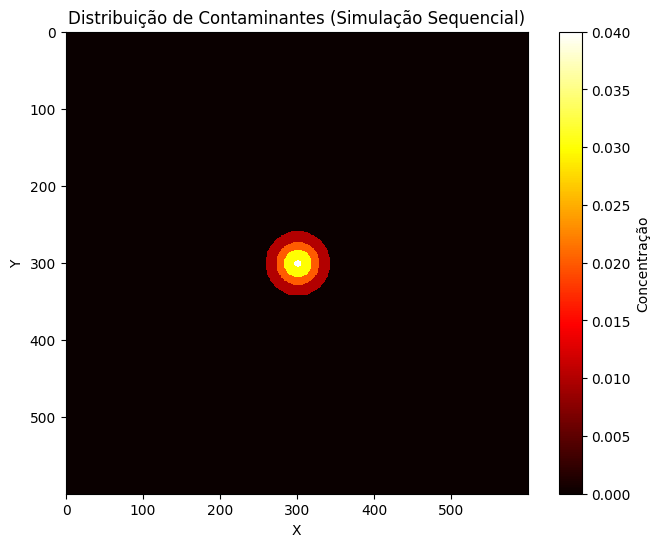

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("output_final.txt")

plt.figure(figsize=(8, 6))
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.colorbar(label='Concentração')
plt.title("Distribuição de Contaminantes (Simulação Sequencial)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Paralelo

In [ ]:
%%writefile main.c

#include <stdio.h>
#include <stdlib.h>
#include <omp.h>

#define N 600         // Dimensão da grade
#define TIME_STEPS 1000 // Número de passos de tempo
#define D 0.1        // Coeficiente de difusão aumentado
#define DT 0.01        // Passo de tempo aumentado
#define DX 1.0        // Distância entre pontos na grade
#define NUM_THREADS 2

void initialize_grid(double grid[N][N]) {
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            grid[i][j] = 0.0;
        }
    }
    int center = N / 2;
    grid[center][center] = 100.0; // Alta concentração no centro
}

void save_grid(double grid[N][N], const char* filename) {
    FILE* file = fopen(filename, "w");
    for (int i = 0; i < N; i++) {
        for (int j = 0; j < N; j++) {
            fprintf(file, "%.2f ", grid[i][j]);
        }
        fprintf(file, "\n");
    }
    fclose(file);
}

int main() {
    double grid[N][N], new_grid[N][N];
    omp_set_num_threads(NUM_THREADS);
    initialize_grid(grid);

    double alpha = D * DT / (DX * DX);
    if (alpha > 0.25) {
        printf("Erro: Fator alpha instável (%.2f).\n", alpha);
        return -1;
    }

    double start_time = omp_get_wtime();

    for (int t = 0; t < TIME_STEPS; t++) {
        #pragma omp parallel for collapse(2)
        for (int i = 1; i < N - 1; i++) {
            for (int j = 1; j < N - 1; j++) {
                new_grid[i][j] = grid[i][j] + alpha * (
                    grid[i+1][j] + grid[i-1][j] +
                    grid[i][j+1] + grid[i][j-1] -
                    4 * grid[i][j]
                );
            }
        }

        #pragma omp parallel for collapse(2)
        for (int i = 1; i < N - 1; i++) {
            for (int j = 1; j < N - 1; j++) {
                grid[i][j] = new_grid[i][j];
            }
        }

        // Condições de contorno: bordas fixas
        #pragma omp parallel for
        for (int i = 0; i < N; i++) {
            grid[i][0] = grid[i][N-1] = 0.0;
            grid[0][i] = grid[N-1][i] = 0.0;
        }

        if (t % 100 == 0) { // Salvar a cada 100 iterações
            char filename[50];
            sprintf(filename, "paralelo_output_step_%d.txt", t);
            save_grid(grid, filename);
        }
    }

    double end_time = omp_get_wtime();
    printf("Simulação finalizada em %.2f segundos.\n", end_time - start_time);
    save_grid(grid, "paralelo_output_final.txt");
    return 0;
}


Overwriting main.c


In [ ]:
%%shell
gcc -fopenmp main.c -o main
./main

Simulação finalizada em 5.10 segundos.


#### Gráfico

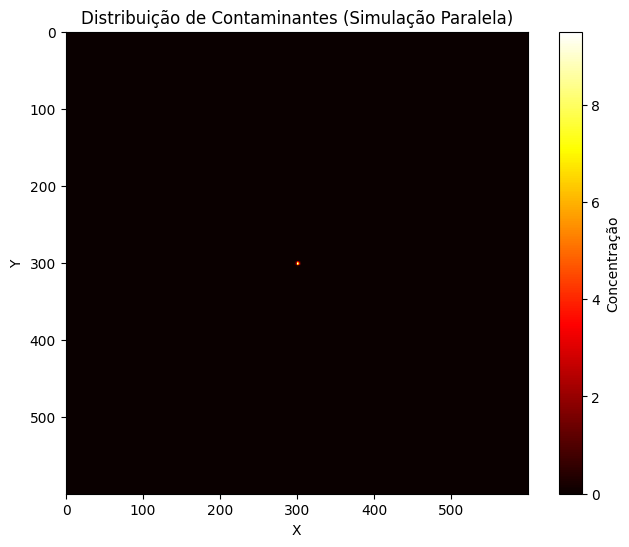

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('paralelo_output_final.txt')

plt.figure(figsize=(8, 6))
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.colorbar(label='Concentração')
plt.title('Distribuição de Contaminantes (Simulação Paralela)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
